In [1]:
import time
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# Haar Cascades

How does Haar cascade work?
<br>
- Trained on two image categories: one class with faecs and the other without.
1. Haar feature selection: slides windows from left to right, top to bottom to detect features of faces (combination of edge, lines and diagonals with specific spatial arrangement).
2. Compute integral image -- a faster way to compute feature values compared to convolution. 
3. Model training using Adaboost: returns higher confidence score in the area where the model thinks it is a face. Remove redundant features and retain only the relevant ones using weak classifiers with weighted final score.
4. Cascading classifiers: if there are enough higher scores in a region, that becomes a detected face. To minimize false negative rate by rejecting non-face regions (decision tree).
- In-depth explanation: https://medium.com/geeky-bawa/face-identification-using-haar-cascade-classifier-af3468a44814
<br>
- Advantages: Lightweight, fast, small model size.
<br>
- Disadvantages: False positives, fair accuracy compared to deep learning models.
<br>
- Download the pre-trained face detector model on OpenCV GitHub: https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

# Detect Faces in an Image

In [2]:
# load classifier

face_detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

In [3]:
# load image

img = cv2.imread('./group-photo.jpg')

In [4]:
# convert to RGB and greyscale

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

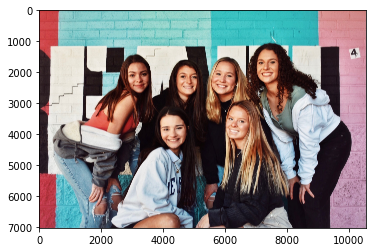

In [5]:
plt.imshow(img_RGB)

Photo by Leah Hetteberg on Unsplash: https://unsplash.com/photos/Kb8_42IFMFk

In [6]:
# detect faces

detected_faces = face_detector.detectMultiScale(image=img_gray, scaleFactor=1.1, minNeighbors=20)

In [7]:
# draw a bounding box for every detected face

for (top_left_x, top_left_y, width, height) in detected_faces:
    cv2.rectangle(img=img_RGB, pt1=(top_left_x, top_left_y), pt2=(top_left_x+width, top_left_y+height), 
                  color=(255, 0, 0), thickness=30)

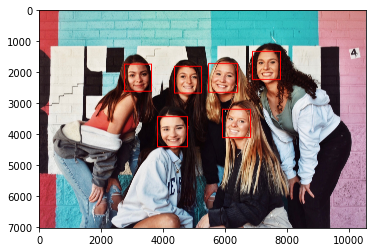

In [8]:
# display image
plt.imshow(img_RGB)

# Detect Faces in a Video

In [9]:
# capture video from default camera
video_frames = cv2.VideoCapture(0)  # 0: default camera

# get frame size from camera
frame_width = int(video_frames.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_frames.get(cv2.CAP_PROP_FRAME_HEIGHT))

# initialize writer
# fourcc: video codec. DIVX for windows, XVID for linux and macOS
# fps: 30
writer = cv2.VideoWriter('./my_video_face.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (frame_width, frame_height))   
 
# loop: grab frame and display image
while True:
    # read frames
    ret, frame = video_frames.read()
    
    # convert frame to greyscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # detect faces
    detected_faces = face_detector.detectMultiScale(image=frame_gray, scaleFactor=1.1, minNeighbors=20)
    
    # draw a bounding box for every detected face
    for (top_left_x, top_left_y, width, height) in detected_faces:
        cv2.rectangle(img=frame, pt1=(top_left_x, top_left_y), pt2=(top_left_x+width, top_left_y+height), 
                      color=(255, 0, 0), thickness=2)
    
    # save video
    writer.write(frame)
    
    # show frame
    cv2.imshow('frame', frame)
    
    # if frame is display for more than 1 ms and ESC key is pressed, close display
    if cv2.waitKey(1) & 0xFF == 27:
        break

video_frames.release()
writer.release()
cv2.destroyAllWindows()